Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Reading the data and storing it in dataframe

In [ ]:
rire_df = pd.read_csv('/content/drive/MyDrive/Sem2/IR/Assignment 2/IR-assignment-2-data.txt',sep=' ', header=None)

Ques 3 1) #Considering only the queries with qid:4

In [ ]:
q3final_df = rire_df[rire_df[1] == "qid:4"] 

# Discounted cumulative gain: DCG measures the usefulness/gain of a document based on its position in the result list.
# The gain is accumulated from the top of the result list to the bottom, with the gain of each
# result discounted at lower ranks.

q3final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,10:1,11:999,12:0,13:110,14:5,15:1114,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:20,22:0,23:5,24:0,25:25,26:1,27:0,28:0,29:0,30:1,31:12,32:0,33:4,34:0,35:16,36:6.666667,37:0,38:1.666667,...,98:0,99:0,100:1,101:0.875901,102:0,103:0.66135,104:0,105:0.864571,106:28.756809,107:0,108:3.274639,109:0,110:28.985515,111:-17.640291,112:-29.251906,113:-20.596041,114:-31.107208,115:-17.519629,116:-19.440921,117:-31.580405,118:-24.146168,119:-33.960286,120:-19.161514,121:-16.596977,122:-31.750477,123:-21.267965,124:-33.908554,125:-16.503638,126:2,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1561,12:2,13:34,14:10,15:1607,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:116,22:0,23:5,24:0,25:121,26:25,27:0,28:1,29:0,30:27,31:46,32:0,33:2,34:0,35:47,36:38.666667,37:0,38:1.666667,...,98:1,99:0,100:1,101:0.955621,102:0,103:0.962572,104:0,105:0.963078,106:46.223212,107:0,108:12.964064,109:0,110:46.49829,111:-11.259261,112:-29.251906,113:-11.236469,114:-31.107208,115:-11.201481,116:-13.644195,117:-31.580405,118:-20.489491,119:-33.960286,120:-13.542059,121:-11.518063,122:-31.750477,123:-9.505871,124:-33.908554,125:-11.463268,126:2,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,10:1,11:1029,12:0,13:110,14:6,15:1145,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:18,22:0,23:5,24:0,25:23,26:1,27:0,28:0,29:0,30:1,31:10,32:0,33:4,34:0,35:14,36:6,37:0,38:1.666667,...,98:0,99:0,100:1,101:0.880123,102:0,103:0.66135,104:0,105:0.869781,106:28.376489,107:0,108:3.274639,109:0,110:28.675516,111:-17.920854,112:-29.251906,113:-20.596041,114:-31.107208,115:-17.740301,116:-19.630119,117:-31.580405,118:-24.146168,119:-33.960286,120:-19.311966,121:-16.866315,122:-31.750477,123:-21.267965,124:-33.908554,125:-16.718408,126:2,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1786,12:0,13:30,14:6,15:1822,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:35,22:0,23:4,24:0,25:39,26:7,27:0,28:1,29:0,30:8,31:20,32:0,33:2,34:0,35:22,36:11.666667,37:0,38:1.333333,...,98:1,99:0,100:1,101:0.974931,102:0,103:0.967197,104:0,105:0.977122,106:32.926477,107:0,108:10.774243,109:0,110:34.410635,111:-15.639025,112:-29.251906,113:-12.328133,114:-31.107208,115:-15.327755,116:-17.616755,117:-31.580405,118:-21.175589,119:-33.960286,120:-17.305299,121:-15.750061,122:-31.750477,123:-9.823879,124:-33.908554,125:-15.463872,126:2,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:725,12:0,13:35,14:6,15:766,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:23,22:0,23:6,24:0,25:29,26:5,27:0,28:2,29:0,30:7,31:9,32:0,33:2,34:0,35:11,36:7.666667,37:0,38:2,...,98:1,99:0,100:1,101:0.973279,102:0,103:1,104:0,105:0.982826,106:39.839113,107:0,108:15.06857,109:0,110:41.913634,111:-14.055812,112:-29.251906,113:-9.857234,114:-31.107208,115:-13.409204,116:-17.560498,117:-31.580405,118:-19.818703,119:-33.960286,120:-16.895742,121:-14.063481,122:-31.750477,123:-8.89964,124:-33.908554,125:-13.491668,126:2,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Ques 3 2) #Making a file rearranging the query-url pairs in order of max DCG.

In [ ]:
result = 1
unique_vals = q3final_df[0].unique()
#unique_vals contains all the unique values in the column 0 of the q3final_df dataframe
print(unique_vals)
q3_list = []

#for loop for all the unique values in the 
for value in unique_vals:
    #lenOflist holds the number of rows with unique_vals for atttribute 0
    lenOflist= len(q3final_df[q3final_df[0]==value])
    print(lenOflist)
    q3_list.append(lenOflist)
    result =  result * math.factorial(lenOflist)

#dataframe q3_dfr holds the sorted values in descending order
q3_dfr = q3final_df.sort_values(by = 0, ascending = False )
q3_dfr = dfr.reset_index(drop=True)
#saving the dataframe to csv
q3_dfr.to_csv('/content/drive/MyDrive/Sem2/IR/Assignment 2/q3DCG.csv')

print("Number of files after rearranging the query-url pairs in order of max DCG for qid:4 is ",result)

[0 1 3 2]
59
26
1
17
Number of files after rearranging the query-url pairs in order of max DCG for qid:4 is  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


Ques 3 3) computing nDCG at 50 and whole dataset

In [ ]:
#function to compute nDCG
def computenDCG(rire_df, n):
    result = 0;
    for i in range(1, n+1):
        result = result + (pow(2, rire_df[0][i-1]) - 1)/(np.log2(i+1))
    return result

In [ ]:
# 3- 2) i)DCG at 50
print("Ques 3 part 3 i) nDCG at 50:",computenDCG(q3final_df,50)/computenDCG(dfr,50))

# 3- 2) ii)DCG for whole dataset
print("Ques 3 part 3 ii) nDCG for whole dataset:",computenDCG(q3final_df,len(q3final_df))/computenDCG(dfr,len(q3final_df)))

Ques 3 part 3 i) nDCG at 50: 0.35612494416255847
Ques 3 part 3 ii) nDCG for whole dataset: 0.5784691984582591


Ques 3 4) 

In [78]:
q3file = open(r'/content/drive/MyDrive/Sem2/IR/Assignment 2/IR-assignment-2-data.txt',encoding="unicode_escape")
q3filecontent = q3file.readlines()

In [79]:
i=0
feedbk=[]
fture_score=[]
for lin in q3filecontent:
    i= i+1
    if lin[lin.find("qid:")+4:lin.find("1:")-1]=="4":
        loc=lin.find("75:")
        loc1=lin.find("76:")
        feedbk.append(int(lin[0]))
        fture_score.append(float(lin[loc+3:loc1-1]))
        if float(lin[loc+3:loc1-1])==0.0:
            print(lin)

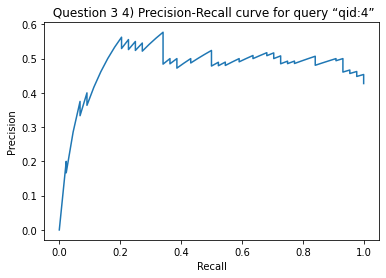

In [80]:
final_list = [x for _,x in sorted(zip(fture_score,feedbk),reverse=True)]
relevence_judgement_value=0

precision_list=[]
recall_list=[]
cnt=0
relv=0

for ele in final_list:
    if ele!=0:
        relevence_judgement_value+=1

for ele in final_list:
    cnt+=1
    if ele!=0:
        relv+=1
    precision_list.append(relv/cnt)
    recall_list.append(relv/relevence_judgement_value)
plt.plot(recall_list,precision_list)
plt.xlabel("Recall")
plt.title(" Question 3 4) Precision-Recall curve for query “qid:4”")
plt.ylabel("Precision")
plt.show()

In [81]:
#references  : https://machinelearningmedium.com/2017/07/24/discounted-cumulative-gain/